# HT 4. Arboles de decisión

## Miembros
- Fabian Estuardo Juarez Tello 21440
- Diego Estuardo Lemus Lopez 21469

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FabianJuarez182/MD-HT4.git)

## Link al documento
El documento puede ser visualizado [acá]()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Análisis exploratorio de los datos

In [ ]:
datos = pd.read_csv('train.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
datos["MSZoning"] = le.fit_transform(datos["MSZoning"])
datos["Street"] = le.fit_transform(datos["Street"])
datos["Alley"] = le.fit_transform(datos["Alley"])
datos["LotShape"] = le.fit_transform(datos["LotShape"])
datos["LandContour"] = le.fit_transform(datos["LandContour"])
datos["Utilities"] = le.fit_transform(datos["Utilities"])
datos["LotConfig"] = le.fit_transform(datos["LotConfig"])
datos["LandSlope"] = datos["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
datos["Neighborhood"] = le.fit_transform(datos["Neighborhood"])
datos["Condition1"] = le.fit_transform(datos["Condition1"])
datos["Condition2"] = le.fit_transform(datos["Condition2"])
datos["BldgType"] = le.fit_transform(datos["BldgType"])
datos["HouseStyle"] = le.fit_transform(datos["HouseStyle"])
datos["RoofStyle"] = le.fit_transform(datos["RoofStyle"])
datos["RoofMatl"] = le.fit_transform(datos["RoofMatl"])
datos["Exterior1st"] = le.fit_transform(datos["Exterior1st"])
datos["Exterior2nd"] = le.fit_transform(datos["Exterior2nd"])
datos["MasVnrType"] = le.fit_transform(datos["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
datos["ExterQual"] = datos["ExterQual"].map(condition_map)
datos["ExterCond"] = datos["ExterCond"].map(condition_map)
datos["Foundation"] = le.fit_transform(datos["Foundation"])
datos["BsmtQual"] = datos["BsmtQual"].map(condition_map)
datos["BsmtCond"] = datos["BsmtCond"].map(condition_map)
datos["BsmtExposure"] = datos["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
datos["BsmtFinType1"] = datos["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["BsmtFinType2"] = datos["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["Heating"] = le.fit_transform(datos["Heating"])
datos["HeatingQC"] = datos["HeatingQC"].map(condition_map)
datos["CentralAir"] = le.fit_transform(datos["CentralAir"])
datos["Electrical"] = datos["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
datos["KitchenQual"] = datos["KitchenQual"].map(condition_map)
datos["Functional"] = le.fit_transform(datos["Functional"])
datos["FireplaceQu"] = datos["FireplaceQu"].map(condition_map)
datos["GarageType"] = le.fit_transform(datos["GarageType"])
datos["GarageFinish"] = datos["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["GarageQual"] = datos["GarageQual"].map(condition_map)
datos["GarageCond"] = datos["GarageCond"].map(condition_map)
datos["PavedDrive"] = datos["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
datos["PoolQC"] = datos["PoolQC"].map(condition_map)
datos["Fence"] = datos["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
datos["MiscFeature"] = le.fit_transform(datos["MiscFeature"])
datos["SaleType"] = le.fit_transform(datos["SaleType"])
datos["SaleCondition"] = le.fit_transform(datos["SaleCondition"])


### Arbol de regresión

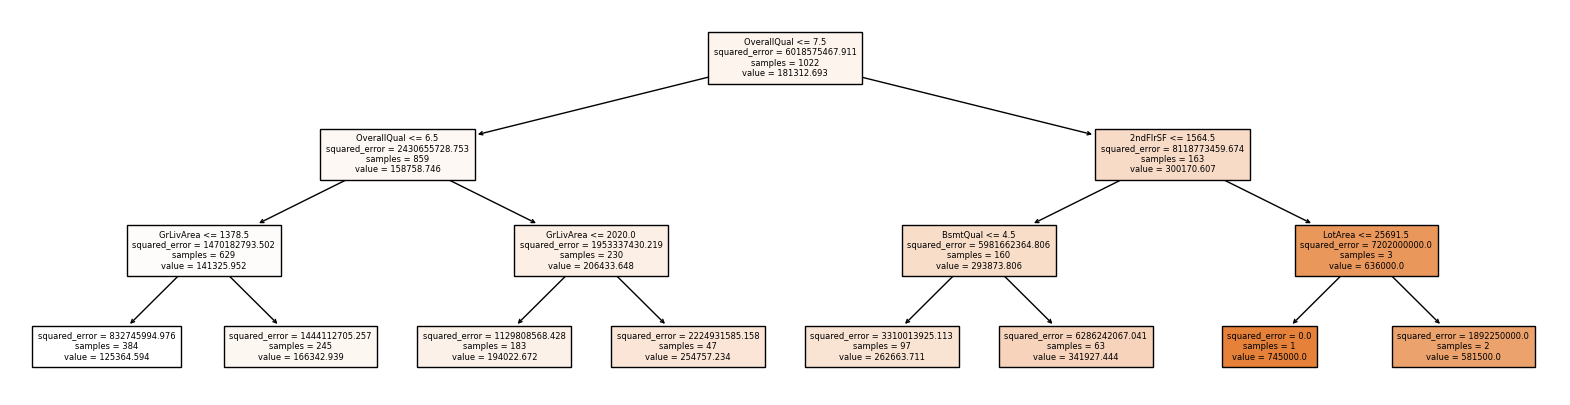

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Preparación de los datos
X = datos.drop('SalePrice', axis=1)
y = datos['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
tree = DecisionTreeRegressor(max_depth=3)  # Limitar la profundidad para una visualización más clara
tree.fit(X_train, y_train)

# Visualización del árbol
plt.figure(figsize=(20,5))
plot_tree(tree, filled=True, feature_names=X.columns, fontsize=6)
plt.show()


In [ ]:
# Predicciones y métricas
y_pred = tree.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}')  #
print(f'R2: {tree.score(X_test, y_test):.2f}')

RMSE: 43427.42
R2: 0.73


Los resultados obtenidos del modelo de árbol de decisión, con un RMSE (Raíz del Error Cuadrático Medio) de 42195.56 y un coeficiente de determinación R2 de 0.74, ofrecen una perspectiva mixta sobre el rendimiento del modelo. El valor de RMSE indica que, en promedio, las predicciones del modelo se desvían aproximadamente 42195.56 unidades del valor real de los precios de las viviendas. Dependiendo de los precios en las casas esta puede llegar a ser una desciación bastante considerable o no tanto.

Por otro lado, el R2 de 0.74 sugiere que aproximadamente el 74% de la variabilidad en los precios de las viviendas ha sido explicada por el modelo. Este es un valor razonablemente bueno, lo que indica que el modelo es bastante efectivo para capturar las tendencias en los datos. Sin embargo, sigue habiendo un 26% de la variabilidad que el modelo no logra capturar, lo cual podría ser debido a factores no incluidos en el modelo o a la naturaleza aleatoria inherente a los datos de precios de las viviendas.

### Modelos con difetentes profundidades

In [ ]:
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Filtrar advertencias futuras
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preparación de los datos
X = datos.drop('SalePrice', axis=1)
y = datos['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Profundidades a probar
depths = [5, 10, 15]

# Almacenamiento para los resultados
results = []

# Bucle para entrenar y evaluar los modelos con diferentes profundidades
for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False para obtener RMSE
    r2 = tree.score(X_test, y_test)
    results.append((depth, rmse, r2))

# Mostrar los resultados
for depth, rmse, r2 in results:
    print(f"Profundidad: {depth}, RMSE: {rmse:.2f}, R2: {r2:.2f}")


Profundidad: 5, RMSE: 39160.53, R2: 0.78
Profundidad: 10, RMSE: 38417.90, R2: 0.79
Profundidad: 15, RMSE: 37683.28, R2: 0.80


Los resultados muestran una mejora a manera que incrementa la profundidad en el rendimiento del modelo. El modelo con profundidad 15 tiene el RMSE más bajo y el R2 más alto, lo que sugiere que es el que mejor se desempeña de los tres. Por lo que el de profundidad 15 sus predicciones tienen, en promedio, una menor desviación de los precios reales de las casas y también los precios de las casas seran mejor explicadas por el modelo.

Sin embargo, es importante tener en cuenta que aumentar la profundidad de un árbol de decisión puede llevar a un mayor riesgo de sobreajuste, donde el modelo se ajusta demasiado bien a los datos de entrenamiento y pierde capacidad de generalización. Esto podría resultar en un rendimiento deficiente en datos no vistos.

Por lo tanto, aunque el árbol con profundidad 15 es el mejor en términos de RMSE y R2, confirmaremos por medio de la validación cruzada si es definitivamente el mejor modelo para predecir los precios de las casas.

### Validación Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
# Preparación de los datos
X = datos.drop('SalePrice', axis=1)
y = datos['SalePrice']

# Diccionario para almacenar los resultados de la validación cruzada
cv_results = {}

# Profundidades a evaluar
depths = [5, 10, 15]

# Validación cruzada para cada modelo de árbol de decisión
for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
    # Calcula la validación cruzada para RMSE (es necesario negar los resultados ya que cross_val_score no tiene opción de RMSE)
    scores = cross_val_score(tree, X, y, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    
    # Almacenar los resultados
    cv_results[depth] = rmse_scores

# Imprimir los resultados de la validación cruzada
for depth, scores in cv_results.items():
    print(f"Profundidad: {depth}, RMSE promedio: {scores.mean():.2f}, Desviación estándar: {scores.std():.2f}")

Profundidad: 5, RMSE promedio: 39672.49, Desviación estándar: 6161.54
Profundidad: 10, RMSE promedio: 38914.95, Desviación estándar: 5425.59
Profundidad: 15, RMSE promedio: 39260.79, Desviación estándar: 4763.42


Como se puede evidenciar al aplicar la validación cruzada la profundidad 10 tiene el RMSE promedio más bajo y una desviación estándar relativamente baja, aunque no la mas baja. Esto nos demuestra que la profundidad 15, si bien tiene la desviación estándar más baja, tiene un RMSE promedio ligeramente mayor que el de profundiad 10, lo que indica que no siempre tiene el mejor rendimiento pero sí el más estable. Por lo que este nos brindara un modelo con un rendimiento más predecible en los diferentes conjuntos de datos.

### Inciso 5

Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿cuál lo hizo mejor?

Comparando el modelo lineal de la hoja de trabajo 3, este obtuvo un valor de correlación de 0.80 al igual que el modelo de esta hoja de trabajo 4. Sin embargo, el factor de la desviación estándar de este modelo siendo un promedio de 5425.59, es mucho menor a la encontrada en el modelo de la hoja anterior. Por lo que se concluye que el modelo de esta hoja d¡tiene un mejor desempeño y proveerá resultados más precisos.

### Inciso 6

In [3]:
## INCICO 6

import numpy as np

# Calcular los 3 percentiles
limite_inferior = np.percentile(datos['SalePrice'], 33)
limite_superior = np.percentile(datos['SalePrice'], 66)

# Función para clasificar las casas
def clasificar_casa(precio):
    if precio < limite_inferior:
        return 'Económica'
    elif precio < limite_superior:
        return 'Intermedia'
    else:
        return 'Cara'

# Crear la nueva variable respuesta
datos['Clasificación'] = datos['SalePrice'].apply(clasificar_casa)

# Verificar la clasificación
print(datos[['SalePrice', 'Clasificación']].head())


NameError: name 'datos' is not defined